In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
raw = pd.read_csv("../data/Data.csv")

In [64]:
raw.head()

,Unnamed: 0,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,...,Group13_58,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,LAB,Response
0,1,0.0,0.0,0.009140,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,177.331194,0.971717,0.430281,11.980651,0.0,A,60.062861
1,2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,86.098721,0.0,184.539779,1.040365,0.477488,13.452968,0.0,B,19.350732
2,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,184.230167,0.0,181.902155,0.961431,0.412368,12.952387,0.0,C,20.227076
3,4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,197.748133,1.125438,0.533366,10.863085,0.0,B,38.798884
4,5,0.0,0.0,0.003537,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,176.839320,0.0,168.942908,0.981250,0.466690,11.472632,0.0,B,58.174574


In [65]:
raw.describe()

,Unnamed: 0,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,...,Group13_57,Group13_58,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,Response
count,6360.000000,6360.000000,6360.000000,4420.000000,6359.000000,6354.000000,6358.000000,6355.000000,6359.000000,6360.000000,...,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000
mean,3180.500000,0.001366,0.001741,0.007894,0.000502,0.000788,0.003949,0.001320,0.003386,0.000054,...,0.001576,0.000043,70.669029,0.003297,172.477451,0.997631,0.471405,10.815665,0.850843,38.657683
std,1836.118188,0.108920,0.044628,0.009345,0.013817,0.016883,0.088927,0.025589,0.080741,0.002789,...,0.021805,0.001122,77.979666,0.044472,24.239799,0.094840,0.082216,3.376337,7.635141,12.654940
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.681269,0.289288,0.000000,0.000000,0.000000
25%,1590.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,170.534912,0.945808,0.422798,8.866556,0.000000,29.704819
50%,3180.500000,0.000000,0.000000,0.003494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,37.265122,0.000000,175.445194,0.980674,0.449820,10.878518,0.000000,39.214501
75%,4770.250000,0.000000,0.000000,0.015044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,158.987207,0.000000,182.080545,1.039523,0.499197,11.973781,0.000000,47.723999
max,6360.000000,8.686335,1.648436,0.050277,0.512569,0.491380,2.355276,0.731193,2.958337,0.157241,...,0.440788,0.042260,218.424630,0.853732,226.101243,1.582509,1.057504,27.429051,85.841716,100.000000


In [66]:
raw.isnull().sum()

Unnamed: 0         0
ingredient_1       0
ingredient_2       0
ingredient_3    1940
ingredient_4       1
                ... 
Group13_63         0
Group13_64         0
Group13_65         0
LAB                0
Response           0
Length: 811, dtype: int64

In [67]:
raw.isnull().sum().sum()

11694

In [68]:
# blind replace with 0
raw.fillna(0, inplace=True)

In [69]:
raw.isnull().sum().sum()

0

In [70]:
raw.drop(columns=['Unnamed: 0'], inplace=True)

In [71]:
raw.describe()

,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,...,Group13_57,Group13_58,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,Response
count,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,...,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000
mean,0.001366,0.001741,0.005486,0.000502,0.000787,0.003948,0.001319,0.003386,0.000054,0.000419,...,0.001576,0.000043,70.669029,0.003297,172.477451,0.997631,0.471405,10.815665,0.850843,38.657683
std,0.108920,0.044628,0.008597,0.013816,0.016875,0.088913,0.025579,0.080734,0.002789,0.015540,...,0.021805,0.001122,77.979666,0.044472,24.239799,0.094840,0.082216,3.376337,7.635141,12.654940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.681269,0.289288,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,170.534912,0.945808,0.422798,8.866556,0.000000,29.704819
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,37.265122,0.000000,175.445194,0.980674,0.449820,10.878518,0.000000,39.214501
75%,0.000000,0.000000,0.009876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,158.987207,0.000000,182.080545,1.039523,0.499197,11.973781,0.000000,47.723999
max,8.686335,1.648436,0.050277,0.512569,0.491380,2.355276,0.731193,2.958337,0.157241,0.732679,...,0.440788,0.042260,218.424630,0.853732,226.101243,1.582509,1.057504,27.429051,85.841716,100.000000


In [72]:
raw = raw.rename(columns={'Response': 'targetVar'})

In [73]:
categorical_columns = ['LAB']
raw[categorical_columns] = raw[categorical_columns].astype('category')

In [74]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(raw.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [75]:
if targetCol == totCol:
    X_raw = raw.iloc[:,0:totAttr]
    y_raw = raw.iloc[:,totAttr]
else:
    X_raw = raw.iloc[:,1:totCol]
    y_raw = raw.iloc[:,0]

print("Total shape: {} X shape: {} y shape: {}".format(raw.shape, X_raw.shape, y_raw.shape))

Total shape: (6360, 810) X shape: (6360, 809) y shape: (6360,)


In [76]:
X_raw = pd.get_dummies(X_raw)
print(X_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6360 entries, 0 to 6359
Columns: 811 entries, ingredient_1 to LAB_C
dtypes: float64(808), uint8(3)
memory usage: 39.2 MB
None


# Splitting into test train and validation

In [77]:
# Split the data further into training, validation, and test datasets
test_size = 0.2
test_size_validation = 0.1
randomseed = 12345

X_train_val, X_test_df, y_train_val, y_test_df = train_test_split(X_raw, y_raw, test_size=test_size, random_state=randomseed)
X_train_df, X_validation_df, y_train_df, y_validation_df = train_test_split(X_train_val, y_train_val, test_size=test_size_validation, random_state=randomseed)
print("X_train_df.shape: {} y_train_df.shape: {}".format(X_train_df.shape, y_train_df.shape))
print("X_validation_df.shape: {} y_validation_df.shape: {}".format(X_validation_df.shape, y_validation_df.shape))
print("X_test_df.shape: {} y_test_df.shape: {}".format(X_test_df.shape, y_test_df.shape))

X_train_df.shape: (4579, 811) y_train_df.shape: (4579,)
X_validation_df.shape: (509, 811) y_validation_df.shape: (509,)
X_test_df.shape: (1272, 811) y_test_df.shape: (1272,)


In [78]:
# scaling
columns_to_scale = X_train_df.columns[X_train_df.dtypes == 'float64'].tolist()
scaler = preprocessing.StandardScaler()
X_train_df[columns_to_scale] = scaler.fit_transform(X_train_df[columns_to_scale])

# do the same to the validation set
scaled_features = scaler.transform(X_validation_df[columns_to_scale])
X_validation_df.loc[:,tuple(columns_to_scale)] = scaled_features

scaled_features = scaler.transform(X_test_df[columns_to_scale])
X_test_df.loc[:,tuple(columns_to_scale)] = scaled_features

<ipython-input-78-e897c2b08841>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_df[columns_to_scale] = scaler.fit_transform(X_train_df[columns_to_scale])
C:\Users\Kiera\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Kiera\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [79]:
X_train_df.head()

,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,...,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,LAB_A,LAB_B,LAB_C
2820,0.0,-0.037115,0.712768,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.345579,-0.070617,-0.045154,-0.057585,0.156290,-0.681774,-0.112395,0,1,0
5304,0.0,-0.037115,-0.473920,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.897430,-0.070617,-0.040850,-0.634499,-0.688080,0.214289,-0.112395,0,1,0
1887,0.0,-0.037115,-0.639753,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.330444,-0.070617,0.266605,0.158301,0.054966,-0.005877,-0.112395,1,0,0
4485,0.0,-0.037115,-0.639753,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,0.795570,-0.070617,0.089735,-0.054156,-0.206578,0.874604,-0.112395,0,1,0
964,0.0,-0.037115,-0.543481,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.897430,-0.070617,-0.477494,-1.813477,-1.475231,-0.249065,-0.112395,0,1,0


In [80]:
y_train_df.describe()

count    4579.000000
mean       38.491500
std        12.716172
min         0.000000
25%        29.557516
50%        39.074490
75%        47.608137
max        91.721574
Name: targetVar, dtype: float64

In [81]:
y_test_df.describe()

count    1272.000000
mean       39.110552
std        12.272413
min         7.672798
25%        30.329839
50%        39.577594
75%        47.876513
max        80.229209
Name: targetVar, dtype: float64

In [82]:
# Finalize the training and validation datasets for the modeling activities
X_train = X_train_df.to_numpy()
y_train = y_train_df.ravel()
X_validation = X_validation_df.to_numpy()
y_validation = y_validation_df.ravel()
print("X_train.shape: {} y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_validation.shape: {} y_validation.shape: {}".format(X_validation.shape, y_validation.shape))

X_train.shape: (4579, 811) y_train.shape: (4579,)
X_validation.shape: (509, 811) y_validation.shape: (509,)


In [83]:
# save it as a file
file_name = "../data/lubrizol.h5"
X_train_df.to_hdf(file_name, key='X_train', mode='w', format='t')
X_test_df.to_hdf(file_name, key='X_test', append=True, format='t')
X_validation_df.to_hdf(file_name, key='X_validation', append=True, format='t')
y_train_df.to_hdf(file_name, key='y_train', append=True, format='t')
y_test_df.to_hdf(file_name, key='y_test', append=True, format='t')
y_validation_df.to_hdf(file_name, key='y_validation', append=True, format='t')

In [84]:
X_test = X_test_df.to_numpy()
y_test = y_test_df.ravel()
print("X_test.shape: {} y_test.shape: {}".format(X_test.shape, y_test.shape))

X_test.shape: (1272, 811) y_test.shape: (1272,)


In [85]:
## Regression Modelling

In [86]:
# theil = linear_model.TheilSenRegressor(n_jobs=-1)

# theil.fit(X_train, y_train)

In [87]:
# y_hat = theil.predict(X_test)
# y_hat

In [88]:
# score = theil.score(X_test)
# score

In [89]:
# a new method

# Correlation Feature Selection
Which features directly correlate to increase / decrease in response variable

In [90]:
# correlation feature selection
def select_correlation_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [91]:
# feature selection
X_train_fs, X_test_fs, fs = select_correlation_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: nan
Feature 1: 5.815880
Feature 2: 3.796229
Feature 3: 0.892410
Feature 4: 1.608651
Feature 5: 0.934605
Feature 6: 0.657607
Feature 7: 10.585967
Feature 8: 4.715435
Feature 9: 3.804615
Feature 10: 3.213083
Feature 11: 9.587973
Feature 12: 1.052954
Feature 13: 0.429592
Feature 14: 2.178650
Feature 15: 0.199752
Feature 16: 3.181809
Feature 17: 0.828776
Feature 18: 0.030051
Feature 19: 31.465626
Feature 20: 1.273281
Feature 21: 0.047089
Feature 22: 0.644922
Feature 23: 0.114802
Feature 24: 2.715440
Feature 25: 26.078259
Feature 26: 0.537597
Feature 27: 0.042569
Feature 28: 2.519392
Feature 29: 0.371999
Feature 30: 5.187416
Feature 31: 0.922812
Feature 32: 1.600084
Feature 33: 44.361647
Feature 34: 5.939146
Feature 35: 1.296075
Feature 36: 9.853217
Feature 37: 0.044479
Feature 38: 0.002122
Feature 39: 0.289033
Feature 40: 5.165383
Feature 41: 98.011738
Feature 42: 1.820933
Feature 43: 0.123149
Feature 44: 0.001349
Feature 45: 46.046824
Feature 46: 38.731584
Feature 47: 0.000955


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Kiera\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


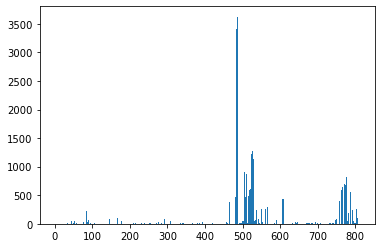

In [92]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Mutual Information Gain
Measuring the reduction of uncertainty for one variable given a known value of the other variable

In [93]:
# mutual info feature selection
def select_mutual_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [94]:
# feature selection
X_train_fs, X_test_fs, fs = select_mutual_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.000340
Feature 6: 0.000371
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.000073
Feature 10: 0.002745
Feature 11: 0.000192
Feature 12: 0.000000
Feature 13: 0.000291
Feature 14: 0.000073
Feature 15: 0.000073
Feature 16: 0.000000
Feature 17: 0.000146
Feature 18: 0.000000
Feature 19: 0.010565
Feature 20: 0.000000
Feature 21: 0.002086
Feature 22: 0.000145
Feature 23: 0.000000
Feature 24: 0.000000
Feature 25: 0.003832
Feature 26: 0.005322
Feature 27: 0.000154
Feature 28: 0.000000
Feature 29: 0.000145
Feature 30: 0.000081
Feature 31: 0.000000
Feature 32: 0.000000
Feature 33: 0.005591
Feature 34: 0.000227
Feature 35: 0.000378
Feature 36: 0.000435
Feature 37: 0.024760
Feature 38: 0.000145
Feature 39: 0.000146
Feature 40: 0.002829
Feature 41: 0.024632
Feature 42: 0.028489
Feature 43: 0.000000
Feature 44: 0.000000
Feature 45: 0.008343
Feature 46: 0.007240
Feature 47: 0.000000
Fe

# New Models w/ Feature Selection

MAE: 2145259759762.8726
MSE: 2.8819913210738185e+27
R^2: -1.9150243273409267e+25


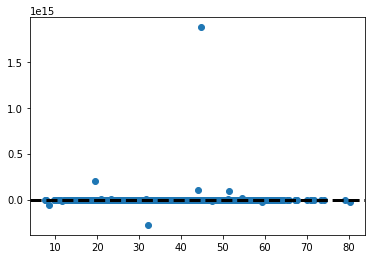

In [95]:
# fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

MAE: 2145259759762.8726
MSE: 2.8819913210738185e+27
R^2: -1.9150243273409267e+25


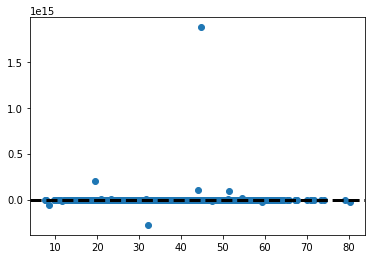

In [96]:
# fit the model
model = linear_model.LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [97]:
print(y_hat)

[44.46777344 44.74707031 42.46777344 ... 37.61621094 47.17871094
 64.56152344]


MAE: 234600700830.0514
MSE: 1.213135151640391e+24
R^2: -8.061035127885687e+21


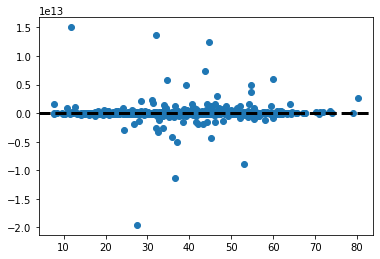

In [98]:
# fit the model
model = linear_model.SGDRegressor()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [99]:
L2 = [ x for x in y_hat if 0 < x < 100 ]
L2

[]

In [100]:
y_hat.mean()
y_hat.sort()

y_modified = y_hat[(y_hat < 0 )]
y_modified

array([-1.95508771e+13, -1.12650971e+13, -8.82785748e+12, -4.98407933e+12,
       -4.28976878e+12, -4.13314731e+12, -3.30330794e+12, -2.95932223e+12,
       -2.64885667e+12, -2.59874775e+12, -1.95355399e+12, -1.93192003e+12,
       -1.83748917e+12, -1.62002198e+12, -1.60929743e+12, -1.55630045e+12,
       -1.47106515e+12, -1.45313204e+12, -1.30328922e+12, -1.27642776e+12,
       -1.26602299e+12, -9.51639040e+11, -9.22482325e+11, -8.55811418e+11,
       -6.71191528e+11, -6.42809179e+11, -6.25589683e+11, -5.66692208e+11,
       -5.65919697e+11, -5.36655262e+11, -5.24464672e+11, -5.14871262e+11,
       -5.08443238e+11, -5.06402172e+11, -4.41119539e+11, -4.32228363e+11,
       -3.97273304e+11, -3.93612667e+11, -3.75495506e+11, -3.60148919e+11,
       -3.43773771e+11, -3.38381131e+11, -3.36645100e+11, -3.36361266e+11,
       -3.34377491e+11, -3.28179678e+11, -3.21817909e+11, -3.12523951e+11,
       -2.95876485e+11, -2.95237775e+11, -2.94805966e+11, -2.84730994e+11,
       -2.74103943e+11, -

MAE: 203886213116.31775
MSE: 6.460842653693053e+23
R^2: -4.2930978891130387e+21


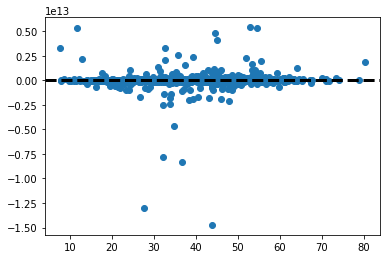

In [101]:
# fit the model
model = linear_model.SGDRegressor()
model.fit(X_train_fs, y_train)
# evaluate the model
y_hat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

# Validator 

## Full Dataset

In [102]:
# Set up the comparison array
tune_results = []

tune_model = ExtraTreesRegressor(n_jobs=-1)

paramGrid = dict(n_estimators=np.array([10, 50, 100, 150, 200]))

kfold = KFold(n_splits=5, shuffle=True)
grid1 = GridSearchCV(estimator=tune_model, param_grid=paramGrid, scoring="neg_mean_absolute_error", cv=kfold, n_jobs=-1, verbose=1)

grid_result = grid1.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
tune_results.append(grid_result.cv_results_['mean_test_score'])
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished


Best: -5.493090 using {'n_estimators': 200}
-5.782709 (0.184481) with: {'n_estimators': 10}
-5.543735 (0.196332) with: {'n_estimators': 50}
-5.493233 (0.164228) with: {'n_estimators': 100}
-5.497490 (0.154356) with: {'n_estimators': 150}
-5.493090 (0.174869) with: {'n_estimators': 200}


In [103]:
best_paramKey = list(grid_result.best_params_.keys())[0]
best_paramValue = list(grid_result.best_params_.values())[0]
print("Captured the best parameter for Extra Trees:", best_paramKey, '=', best_paramValue)

Captured the best parameter for Extra Trees: n_estimators = 200


In [104]:
validation_model = ExtraTreesRegressor(n_estimators=best_paramValue, n_jobs=-1)
validation_model.fit(X_train, y_train)
print(validation_model)
predictions = validation_model.predict(X_validation)
print('Mean Absolute Error:', mean_absolute_error(y_validation, predictions))
print('Mean Squared Error:', mean_squared_error(y_validation, predictions))
print('R^2 Score:', r2_score(y_validation, predictions))

ExtraTreesRegressor(n_estimators=200, n_jobs=-1)
Mean Absolute Error: 4.971435828323462
Mean Squared Error: 43.62399922346633
R^2 Score: 0.7424898995484395


In [105]:
# Combining the training and validation datasets to form the complete dataset that will be used for training the final model
X_complete = np.vstack((X_train, X_validation))
y_complete = np.concatenate((y_train, y_validation))
print("X_complete.shape: {} y_complete.shape: {}".format(X_complete.shape, y_complete.shape))
test_model = validation_model.fit(X_complete, y_complete)
print(test_model)

X_complete.shape: (5088, 811) y_complete.shape: (5088,)
ExtraTreesRegressor(n_estimators=200, n_jobs=-1)


In [106]:
test_predictions = test_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, test_predictions))
print('Mean Squared Error:', mean_squared_error(y_test, test_predictions))
print('R^2 Score:', r2_score(y_test, test_predictions))

Mean Absolute Error: 5.122985412337353
Mean Squared Error: 45.231641042766626
R^2 Score: 0.6994449902431481


## Feature Selected
### Mutual Feature Information Gain

In [107]:
# mutual info feature selection
def select_mutual_features_validation(X_train, y_train, X_test, X_validation):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    # transform validation input data
    X_validation_fs = fs.transform(X_validation)
    return X_train_fs, X_test_fs, X_validation_fs, fs

In [108]:
# create feature selected versions
X_train_fs, X_test_fs, X_validation_fs, fs = select_mutual_features_validation(X_train, y_train, X_test, X_validation)

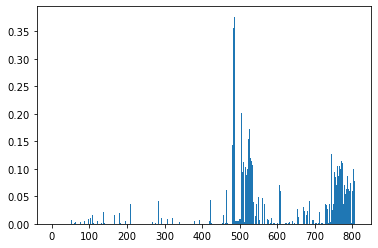

In [109]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [110]:
# Set up the comparison array
tune_results = []

tune_model = ExtraTreesRegressor(n_jobs=-1)

paramGrid = dict(n_estimators=np.array([10, 50, 100, 150, 200]))

kfold = KFold(n_splits=5, shuffle=True)
grid1 = GridSearchCV(estimator=tune_model, param_grid=paramGrid, scoring="neg_mean_absolute_error", cv=kfold, n_jobs=-1, verbose=1)

grid_result = grid1.fit(X_train_fs, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
tune_results.append(grid_result.cv_results_['mean_test_score'])
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.1min finished


Best: -5.458067 using {'n_estimators': 200}
-5.799732 (0.071062) with: {'n_estimators': 10}
-5.483412 (0.075951) with: {'n_estimators': 50}
-5.476488 (0.099865) with: {'n_estimators': 100}
-5.461549 (0.075576) with: {'n_estimators': 150}
-5.458067 (0.100416) with: {'n_estimators': 200}


In [111]:
best_paramKey = list(grid_result.best_params_.keys())[0]
best_paramValue = list(grid_result.best_params_.values())[0]
print("Captured the best parameter for Extra Trees:", best_paramKey, '=', best_paramValue)

Captured the best parameter for Extra Trees: n_estimators = 200


In [112]:
validation_model = ExtraTreesRegressor(n_estimators=best_paramValue, n_jobs=-1)
validation_model.fit(X_train_fs, y_train)
print(validation_model)
predictions = validation_model.predict(X_validation_fs)
print('Mean Absolute Error:', mean_absolute_error(y_validation, predictions))
print('Mean Squared Error:', mean_squared_error(y_validation, predictions))
print('R^2 Score:', r2_score(y_validation, predictions))

ExtraTreesRegressor(n_estimators=200, n_jobs=-1)
Mean Absolute Error: 5.027110918529392
Mean Squared Error: 43.838638040777596
R^2 Score: 0.7412228982557909


In [113]:
test_predictions = test_model.predict(X_test_fs)
print('Mean Absolute Error:', mean_absolute_error(y_test, test_predictions))
print('Mean Squared Error:', mean_squared_error(y_test, test_predictions))
print('R^2 Score:', r2_score(y_test, test_predictions))

Mean Absolute Error: 5.122985412337353
Mean Squared Error: 45.231641042766626
R^2 Score: 0.6994449902431481


## Feature Selected
### Correlated Features

In [114]:
# correlation feature selection
def select_correlation_features_validation(X_train, y_train, X_test, X_validation):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    # transform validation input data
    X_validation_fs = fs.transform(X_validation)
    return X_train_fs, X_test_fs, X_validation_fs, fs

In [115]:
# create feature selected versions
X_train_fs, X_test_fs, X_validation_fs, fs = select_correlation_features_validation(X_train, y_train, X_test, X_validation)

C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Kiera\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


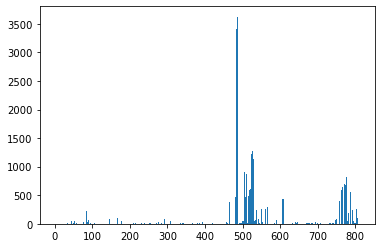

In [116]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [117]:
# Set up the comparison array
tune_results = []

tune_model = ExtraTreesRegressor(n_jobs=-1)

paramGrid = dict(n_estimators=np.array([10, 50, 100, 150, 200]))

kfold = KFold(n_splits=5, shuffle=True)
grid1 = GridSearchCV(estimator=tune_model, param_grid=paramGrid, scoring="neg_mean_absolute_error", cv=kfold, n_jobs=-1, verbose=1)

grid_result = grid1.fit(X_train_fs, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
tune_results.append(grid_result.cv_results_['mean_test_score'])
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.9min finished


Best: -5.467473 using {'n_estimators': 150}
-5.752672 (0.177844) with: {'n_estimators': 10}
-5.551986 (0.161357) with: {'n_estimators': 50}
-5.482870 (0.185607) with: {'n_estimators': 100}
-5.467473 (0.183265) with: {'n_estimators': 150}
-5.468394 (0.177812) with: {'n_estimators': 200}


In [118]:
best_paramKey = list(grid_result.best_params_.keys())[0]
best_paramValue = list(grid_result.best_params_.values())[0]
print("Captured the best parameter for Extra Trees:", best_paramKey, '=', best_paramValue)

Captured the best parameter for Extra Trees: n_estimators = 150


In [119]:
validation_model = ExtraTreesRegressor(n_estimators=best_paramValue, n_jobs=-1)
validation_model.fit(X_train_fs, y_train)
print(validation_model)
predictions = validation_model.predict(X_validation_fs)
print('Mean Absolute Error:', mean_absolute_error(y_validation, predictions))
print('Mean Squared Error:', mean_squared_error(y_validation, predictions))
print('R^2 Score:', r2_score(y_validation, predictions))

ExtraTreesRegressor(n_estimators=150, n_jobs=-1)
Mean Absolute Error: 4.991388382801921
Mean Squared Error: 43.71868279217252
R^2 Score: 0.7419309875797373


In [120]:
test_predictions = test_model.predict(X_test_fs)
print('Mean Absolute Error:', mean_absolute_error(y_test, test_predictions))
print('Mean Squared Error:', mean_squared_error(y_test, test_predictions))
print('R^2 Score:', r2_score(y_test, test_predictions))

Mean Absolute Error: 5.122985412337353
Mean Squared Error: 45.231641042766626
R^2 Score: 0.6994449902431481
